In [12]:
import pandas as pd
import os

def preprocess_data(file_path):
    # 读取数据
    df = pd.read_csv(file_path)
    
    # 检查缺失值并填充或删除
    if df.isnull().values.any():
        df = df.fillna(method='ffill')  # 使用前一帧数据填充
    
    # 添加归一化列
    normalized_columns = []
    for col in df.columns[1:]:  # 假设第1列是Frame列，不做处理
        normalized_col = f"{col}_normalized"
        df[normalized_col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
        normalized_columns.append(normalized_col)  # 记录所有归一化列名
    
    # 只保留正则化列
    df = df[["Frame"] + normalized_columns]  # 保留Frame列和所有正则化列
    
    return df

In [13]:
# 示例调用
file_path = "distance_data/jinzhuibing/p353L.csv"  # 替换为实际路径
df = preprocess_data(file_path)
#print(df.head())
print(df.min())  # 查看每列的最小值
print(df.max())  # 查看每列的最大值
output_path = "distance_data/normalized/jinzhuibing/output.csv"
df.to_csv(output_path, index=False)
print(f"文件已保存至 {output_path}")
#print(df)

Frame                     1.0
Thumb (WT)_normalized     0.0
Index (WI)_normalized     0.0
Middle (WM)_normalized    0.0
Ring (WR)_normalized      0.0
Pinky (WP)_normalized     0.0
dtype: float64
Frame                     251.0
Thumb (WT)_normalized       1.0
Index (WI)_normalized       1.0
Middle (WM)_normalized      1.0
Ring (WR)_normalized        1.0
Pinky (WP)_normalized       1.0
dtype: float64
文件已保存至 distance_data/normalized/jinzhuibing/output.csv


In [ ]:
import pandas as pd
import os

def normalized_data(input_dir, output_dir):
    # 确保输出目录存在，如果不存在则创建
    os.makedirs(output_dir, exist_ok=True)
    # 遍历输入目录中的所有 CSV 文件
    for filename in os.listdir(input_dir):
        if filename.endswith('.csv'):  # 只处理 CSV 文件
            # 获取完整的输入文件路径和输出文件路径
            input_file = os.path.join(input_dir, filename)
            output_file = os.path.join(output_dir, filename)
            # 读取 CSV 文件并作正则化操作
            df = preprocess_data(file_path)
            # 保存正则化后的数据到输出目录
            df.to_csv(output_file, index=False)
            
            print(f"Processed and saved: {filename}")

    print("All files have been processed and saved.")

In [24]:
# 输入和输出目录的映射关系
directories = [
    ('distance_data/pajinseng', 'distance_data/normalized/pajinseng'),
    ('distance_data/jinzhuibing', 'distance_data/normalized/jinzhuibing'),
    ('distance_data/zhongfeng', 'distance_data/normalized/zhongfeng'),
    ('distance_data/yaozhui', 'distance_data/normalized/yaozhui')
]

# 遍历目录列表并调用 normalized_data 函数
for input_dir, output_dir in directories:
    normalized_data(input_dir, output_dir)

input_file: distance_data/pajinseng/p790L.csv
output_file: distance_data/normalized/pajinseng/p790L.csv
input_file: distance_data/pajinseng/p876R.csv
output_file: distance_data/normalized/pajinseng/p876R.csv
input_file: distance_data/pajinseng/p791L.csv
output_file: distance_data/normalized/pajinseng/p791L.csv
input_file: distance_data/pajinseng/p762R.csv
output_file: distance_data/normalized/pajinseng/p762R.csv
input_file: distance_data/pajinseng/p499L.csv
output_file: distance_data/normalized/pajinseng/p499L.csv
input_file: distance_data/pajinseng/p853R.csv
output_file: distance_data/normalized/pajinseng/p853R.csv
input_file: distance_data/pajinseng/p460L.csv
output_file: distance_data/normalized/pajinseng/p460L.csv
input_file: distance_data/pajinseng/p432R.csv
output_file: distance_data/normalized/pajinseng/p432R.csv
input_file: distance_data/pajinseng/p447R.csv
output_file: distance_data/normalized/pajinseng/p447R.csv
input_file: distance_data/pajinseng/p437R.csv
output_file: dista

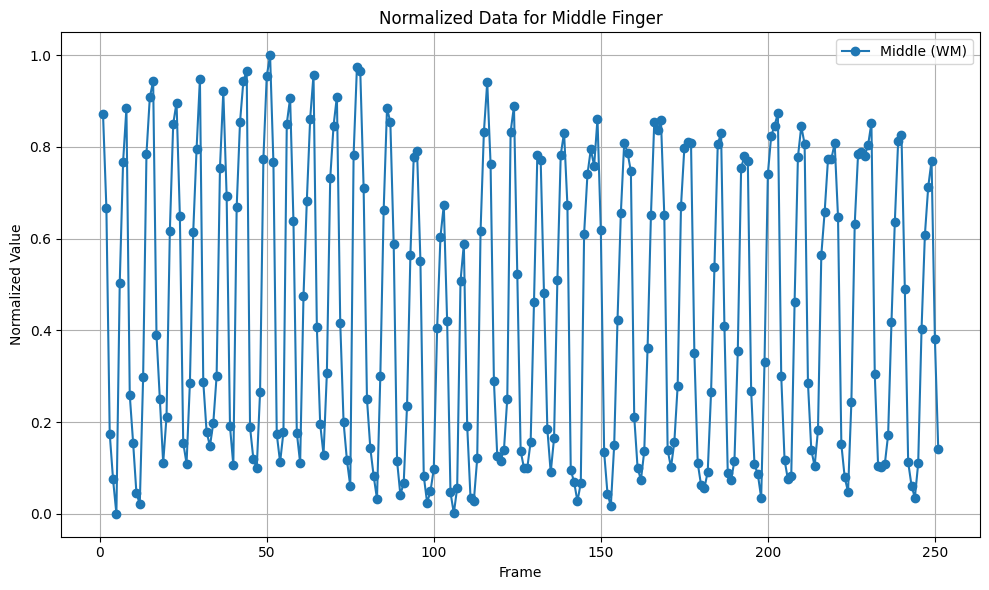

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
file_path = 'distance_data/normalized/jinzhuibing/p353L.csv'  # 替换为实际的CSV文件路径
df = pd.read_csv(file_path)

# 绘制图形
plt.figure(figsize=(10, 6))

# 绘制每一根手指的数据
##plt.plot(df['Frame'], df['Index (WI)_normalized'], label='Index (WI)', marker='o')
plt.plot(df['Frame'], df['Middle (WM)_normalized'], label='Middle (WM)', marker='o')
#plt.plot(df['Frame'], df['Ring (WR)_normalized'], label='Ring (WR)', marker='o')
#plt.plot(df['Frame'], df['Pinky (WP)_normalized'], label='Pinky (WP)', marker='o')

# 设置图形标题和标签
plt.title('Normalized Data for Middle Finger')
plt.xlabel('Frame')
plt.ylabel('Normalized Value')

# 显示图例
plt.legend()

# 显示网格
plt.grid(True)

# 显示图形
plt.tight_layout()
plt.show()


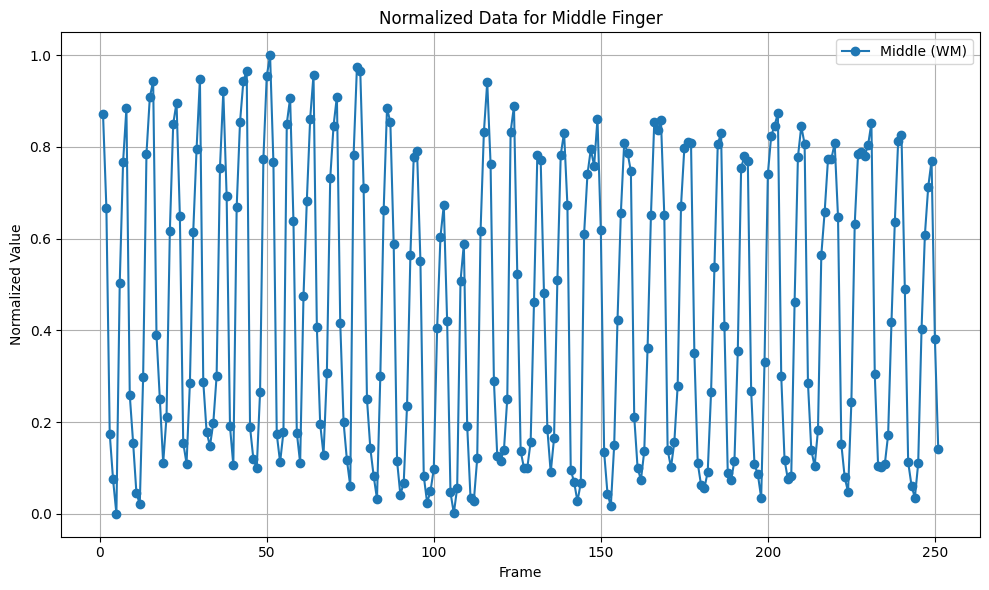

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
file_path = 'distance_data/normalized/pajinseng/p432L.csv'  # 替换为实际的CSV文件路径
df = pd.read_csv(file_path)

# 绘制图形
plt.figure(figsize=(10, 6))

# 绘制每一根手指的数据
##plt.plot(df['Frame'], df['Index (WI)_normalized'], label='Index (WI)', marker='o')
plt.plot(df['Frame'], df['Middle (WM)_normalized'], label='Middle (WM)', marker='o')
#plt.plot(df['Frame'], df['Ring (WR)_normalized'], label='Ring (WR)', marker='o')
#plt.plot(df['Frame'], df['Pinky (WP)_normalized'], label='Pinky (WP)', marker='o')

# 设置图形标题和标签
plt.title('Normalized Data for Middle Finger')
plt.xlabel('Frame')
plt.ylabel('Normalized Value')

# 显示图例
plt.legend()

# 显示网格
plt.grid(True)

# 显示图形
plt.tight_layout()
plt.show()
